# **1. Perkenalan Dataset**

Eksperimen ini menggunakan **Breast Cancer Wisconsin (Diagnostic)** yang berisi 569 sampel tumor payudara dengan 30 fitur numerik hasil ekstraksi citra. Target berisi label 0 (malignant) dan 1 (benign). Tujuan: menyiapkan data bersih, terstandarisasi untuk klasifikasi biner.

Alasan pemilihan dataset:
- Bukan dataset latihan di modul (bukan Iris/MNIST/Wine/Credit).
- Fitur numerik sehingga pipeline preprocessing sederhana.
- Ukuran sedang (569 baris) memudahkan eksperimen cepat.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Lokasi file relatif terhadap notebook
BASE_DIR = Path.cwd()
RAW_PATH = (BASE_DIR / '../namadataset_raw/breast_cancer_raw.csv').resolve()
PREP_DIR = BASE_DIR / 'namadataset_preprocessing'
PREP_DIR.mkdir(exist_ok=True)
RAW_PATH

WindowsPath('C:/Project/Submission_MSML/SMSML_MuhammadAlwanFarras/Eksperimen_SML_MuhammadAlwanFarras/namadataset_raw/breast_cancer_raw.csv')

# **3. Memuat Dataset**

Membaca dataset mentah dari folder 
amadataset_raw lalu menampilkan beberapa baris awal untuk verifikasi.

In [2]:
df = pd.read_csv(RAW_PATH)
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **4. Exploratory Data Analysis (EDA)**

Pemeriksaan struktur data, nilai kosong, dan duplikasi.

In [4]:
print('Struktur kolom:')
df.info()

print('\nRingkasan statistik:')
display(df.describe())

missing = df.isna().sum()
print('\nJumlah nilai kosong per kolom:\n', missing)

duplicates = df.duplicated().sum()
print('\nJumlah baris duplikat:', duplicates)


Struktur kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000



Jumlah nilai kosong per kolom:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Jumlah baris duplikat: 0


Distribusi label untuk memastikan dataset tidak imbang berat sebelah.

target
benign       357
malignant    212
Name: count, dtype: int64


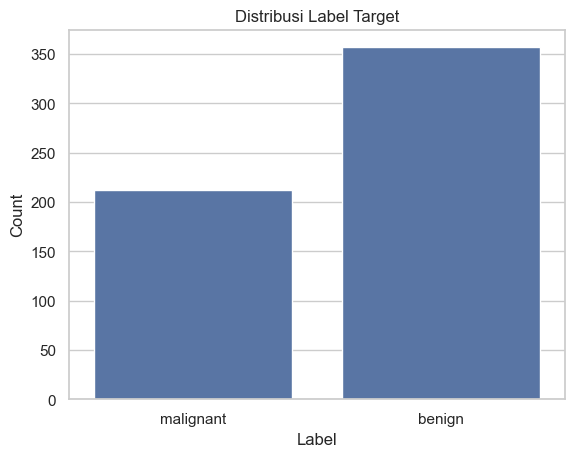

In [5]:
target_counts = df['target'].value_counts().rename({0:'malignant', 1:'benign'})
print(target_counts)

sns.countplot(x=df['target'].map({0:'malignant',1:'benign'}))
plt.title('Distribusi Label Target')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()


Korelasi fitur (subset 10 fitur pertama) untuk melihat hubungan antar fitur.

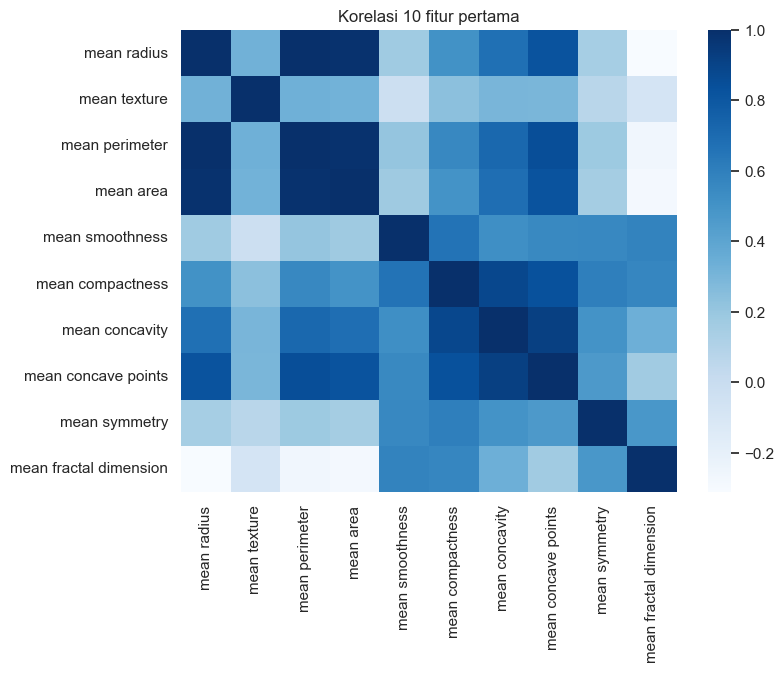

In [6]:
subset_cols = df.columns[:10]
corr = df[subset_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap='Blues')
plt.title('Korelasi 10 fitur pertama')
plt.show()


# **5. Data Preprocessing**

Langkah:
- Drop duplikasi.
- Pisahkan fitur dan target.
- Imputasi median (antisipasi missing).
- Standardisasi fitur numerik.
- Simpan dataset siap latih ke 
amadataset_preprocessing/breast_cancer_preprocessed.csv.

In [7]:
df_clean = df.drop_duplicates().copy()
feature_cols = [c for c in df_clean.columns if c != 'target']

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)

preprocess = ColumnTransformer(
    transformers=[('num', numeric_transformer, feature_cols)],
    remainder='drop'
)

X_processed = preprocess.fit_transform(df_clean[feature_cols])
processed_df = pd.DataFrame(
    X_processed, columns=[f'feature_{i+1}' for i in range(X_processed.shape[1])]
)
processed_df['target'] = df_clean['target'].values

print('Processed shape:', processed_df.shape)
processed_df.head()


Processed shape: (569, 31)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [8]:
output_path = PREP_DIR / 'breast_cancer_preprocessed.csv'
processed_df.to_csv(output_path, index=False)
print('Dataset siap latih disimpan di:', output_path)
processed_df.describe().T


Dataset siap latih disimpan di: c:\Project\Submission_MSML\SMSML_MuhammadAlwanFarras\Eksperimen_SML_MuhammadAlwanFarras\preprocessing\namadataset_preprocessing\breast_cancer_preprocessed.csv


,count,mean,std,min,25%,50%,75%,max
feature_1,569.0,-1.373633e-16,1.000880,-2.029648,-0.689385,-0.215082,0.469393,3.971288
feature_2,569.0,6.868164e-17,1.000880,-2.229249,-0.725963,-0.104636,0.584176,4.651889
feature_3,569.0,-1.248757e-16,1.000880,-1.984504,-0.691956,-0.235980,0.499677,3.976130
feature_4,569.0,-2.185325e-16,1.000880,-1.454443,-0.667195,-0.295187,0.363507,5.250529
feature_5,569.0,-8.366672e-16,1.000880,-3.112085,-0.710963,-0.034891,0.636199,4.770911
feature_6,569.0,1.873136e-16,1.000880,-1.610136,-0.747086,-0.221940,0.493857,4.568425
feature_7,569.0,4.995028e-17,1.000880,-1.114873,-0.743748,-0.342240,0.526062,4.243589
feature_8,569.0,-4.995028e-17,1.000880,-1.261820,-0.737944,-0.397721,0.646935,3.927930
feature_9,569.0,1.748260e-16,1.000880,-2.744117,-0.703240,-0.071627,0.530779,4.484751
feature_10,569.0,4.745277e-16,1.000880,-1.819865,-0.722639,-0.178279,0.470983,4.910919


Dataset siap digunakan untuk tahap modelling selanjutnya. Gunakan file reast_cancer_preprocessed.csv agar pipeline modelling/CI konsisten dengan eksperimen.